# DP - Porovnávanie sekvencií pohľadu
### Overenie dataset MSNV

In [42]:
%matplotlib notebook
%run ./Functions.ipynb

Inicializacia konstant a ciest k suborom

In [15]:
saved_variables_path = "./saved_variables/msnv/"
path = "../data_msnv/"
#gazes_path = "gaze_exports/"
segfiles_path = "seg_files/"
aois_path = "aois/"
data_by_screen_path = "data_by_tasks/"
PATH_CALIB_DATA = path + "calibration_data" # tato premenna sa musi takto volat

#metrics_file = "gaze_with_UCs_BT.csv"

aois_names = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","R","S","T","U","V","X","Y","Z",
             "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","r","s","t","u","v","x","y","z",
             "0","1","2","3","4","5","6","7","8","9"]

In [6]:
#gaze_exports_names = [f for f in listdir(path + gazes_path) if isfile(join(path + gazes_path, f))][:-4]
seg_files_names = [f for f in listdir(path + segfiles_path) if isfile(join(path + segfiles_path, f))]
aois_files_names = [f for f in listdir(path + aois_path) if isfile(join(path + aois_path, f))]
databyscreens_names = [f for f in listdir(path + data_by_screen_path) if isfile(join(path + data_by_screen_path, f))]

Inicializacia premmenych

In [30]:
# Get all participansts, their names and create instances
ALL_PARTICIPANTS = {}
ALL_PARTICIPANTS_FEATURES_NAMES = []
ALL_PARTICIPANTS_NAMES = [] 
ALL_PARTICIPANTS_AFTER_COMPLETE_CHECK_NAMES = []
DONT_HAVE_ENOUGH_DATA = []
DONT_COMPLETE_TASK = []
DONT_PASS_CALIBRATION = []
DONT_PASS_VALIDATION = []

AOIS = []


Zvolenie ulohy a minimalneho percenta validity dat

In [ ]:
task_index = 10
VALIDITY_PERCENTAGE = 40

Inicialiazacia crt, ktore chceme vyselektovat (podla ich nazvu)

In [8]:
COLUMNS_TO_DROP_0 = ['Name','Scanpath','ScanpathShort', 'FixationsDuration',
                    'MeanLev','MeanLcs','MinLcs','MinLev', 'MaxLcs', 'MaxLev',
                     'NumberOfFixations',  'ReoccurrenceLaminarity', 
                     'RecurrenceMeanX','RecurrenceMeanY', 'AverageSaccadeLength',
                    'NumberOfAoisHits', 'ReoccurrenceDeterminism', 'RecurrenceStandardDeviationY' 
                     ]

__________________________________________

### Výpočet čŕt
Ak už máme črty vypočítané a uložene, nemusíme ich znova počítať a len si ich načítame z časti _Načítanie uložených premenných (vypočítane a uložené črty)_

#### Načítanie datasetu

In [24]:
DATASET = pd.read_csv(path + data_by_screen_path + databyscreens_names[task_index], low_memory=False, sep="\t")
AOIS = load_aois(task_index)

ALL_PARTICIPANTS_NAMES = DATASET['ParticipantName'].unique()

for tester in ALL_PARTICIPANTS_NAMES:
    ALL_PARTICIPANTS[tester] = Participant(tester)

#### Filtrovanie participantov
Vo vypise vidime, kolko participantov bolo z celkoveho poctu v kazdom kroku vyfiltrovanych

In [25]:
DONT_PASS_CALIBRATION, DONT_PASS_VALIDATION = filter_participants(VALIDITY_PERCENTAGE, False, True, False, 0.60, 0.60)

Validation filter: 
52 -> 49
Participants after all filtrations: 
52 -> 49


#### Výpočet čŕt pre participantov
Vo vypise vidime postupne pre ktoreho participanta sa pocitaju crty

In [26]:
ALL_PARTICIPANTS_FEATURES_NAMES = set_participants_features()

Working on P200
Working on P201
Working on P202
Working on P203
Working on P204
Working on P205
Working on P206
Working on P207
Working on P208
Working on P209
Working on P210
Working on P211
Working on P212
Working on P213
Working on P214
Working on P215
Working on P217
Working on P218
Working on P219
Working on P220
Working on P221
Working on P223
Working on P224
Working on P225
Working on P227
Working on P228
Working on P229
Working on P233
Working on P234
Working on P235
Working on P236
Working on P237
Working on P238
Working on P240
Working on P241
Working on P242
Working on P244
Working on P245
Working on P246
Working on P247
Working on P248
Working on P249
Working on P250
Working on P251
Working on P252
Working on P253
Working on P254
Working on P256
Working on P257
-----------------------------------------------------------------------
Other features
Working on P200
Working on P201
Working on P202
Working on P203
Working on P204
Working on P205
Working on P206
Working on P207
W

Vypisanie celkovo vyfiltrovanych participantov

In [29]:
get_overall_dropouts(ALL_PARTICIPANTS_NAMES)

Overal dropouts: 
Participants who didn't complete task = 0 -> []
Participants who didn't pass through validation = 3 -> ['P239', 'P231', 'P226']
Participants who didn't have enough data = 1 -> ['P257']
------------------
All Participants who didnt pass = 4 -> ['P226', 'P239', 'P231', 'P257']


Uloženie vypočítaných hodnôt ak je potreba

In [ ]:
save_variables(TASK_NUMBER, saved_variables_path)

__________________________

### Načítanie uložených premenných (vypočítane a uložené črty)

V pripade, ze mame data predvypocitane a ulozene (ako ze aj mame) tak ich staci iba nacitat

In [9]:
databyscreens_names

['11.tsv',
 '18.tsv',
 '20.tsv',
 '27.tsv',
 '28.tsv',
 '3.tsv',
 '30.tsv',
 '5.tsv',
 '60.tsv',
 '62.tsv',
 '66.tsv',
 '72.tsv',
 '74.tsv',
 '76.tsv',
 '9.tsv']

In [10]:
TASK_NUMBER = databyscreens_names[task_index].split(".")[0]
TASK_NUMBER

'66'

In [31]:
ALL_PARTICIPANTS, ALL_PARTICIPANTS_FEATURES_NAMES, ALL_PARTICIPANTS_NAMES, \
    ALL_PARTICIPANTS_AFTER_COMPLETE_CHECK_NAMES, DONT_HAVE_ENOUGH_DATA, \
        DONT_COMPLETE_TASK, DONT_PASS_CALIBRATION, DONT_PASS_VALIDATION = load_variables(TASK_NUMBER, saved_variables_path)

______________________________________________

## Identifikácia odľahlých hodnôt

#### Príprava dát

Data sa normalizuju a pripravia sa ako vstup do zlukovacich algoritmov 

In [32]:
X, df_names, df_all_data, df_dropped_columns = prepare_data(ALL_PARTICIPANTS_FEATURES_NAMES, COLUMNS_TO_DROP_0)

#### Zhlukovanie

Pri vizualizaciach vidime participantov rozdelenych do zhlukov. Zhluky su odlisene farbou a pri kazdom 2D bode je prislusne ciselne oznacenie participanta 

K-medoids

Silhouette Coefficient: 0.254


<IPython.core.display.Javascript object>


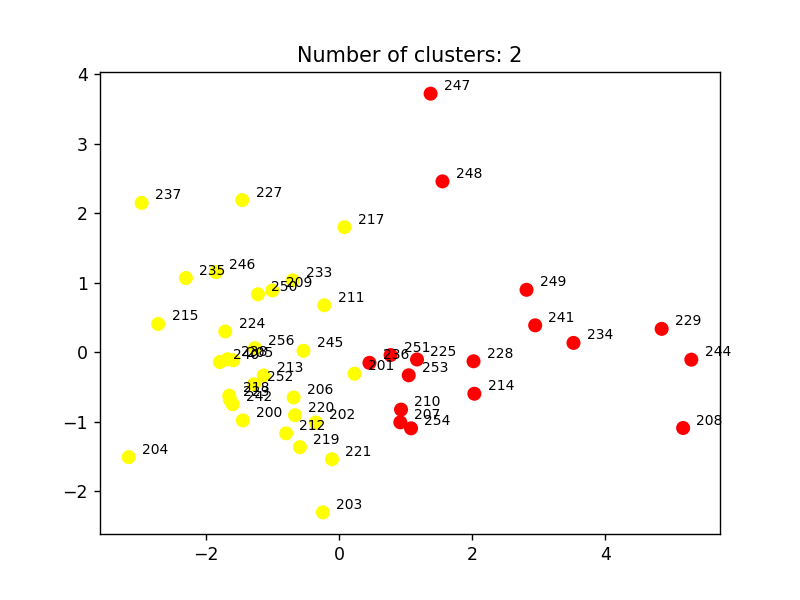

Counter({0: 31, 1: 17})

In [19]:
labels_kmedoids, kmedoids = run_KMEDOIDS(X, df_names,[1,10])
collections.Counter(labels_kmedoids)

K-Means

Silhouette Coefficient: 0.260


<IPython.core.display.Javascript object>


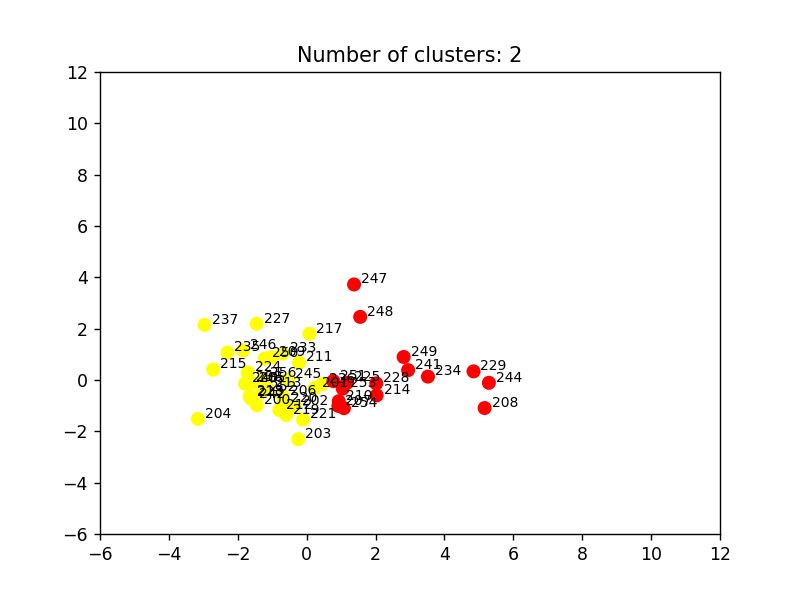

Counter({0: 32, 1: 16})

In [33]:
labels_kmeans, kmeans = run_KMEANS(X, df_names)
collections.Counter(labels_kmeans)

#### Dôležitosť čŕt

Vizualizovana je prenasobena dolezitost crt (dokopy 100 percent)

Feature ranking:
1. feature 7, Reoccurrence (0.321114)
2. feature 3, NumberOfAoisHitsShort (0.242024)
3. feature 4, Recurrence (0.202969)
4. feature 6, RecurrenceStandardDeviationX (0.122408)
5. feature 2, DTW (0.040019)
6. feature 8, ReoccurrenceCORM (0.022723)
7. feature 5, RecurrenceRate (0.022362)
8. feature 1, AverageSaccadeSpeed (0.011181)
9. feature 9, ReoccurrenceRate (0.008367)
10. feature 0, AverageFixationDuration (0.006833)


<IPython.core.display.Javascript object>


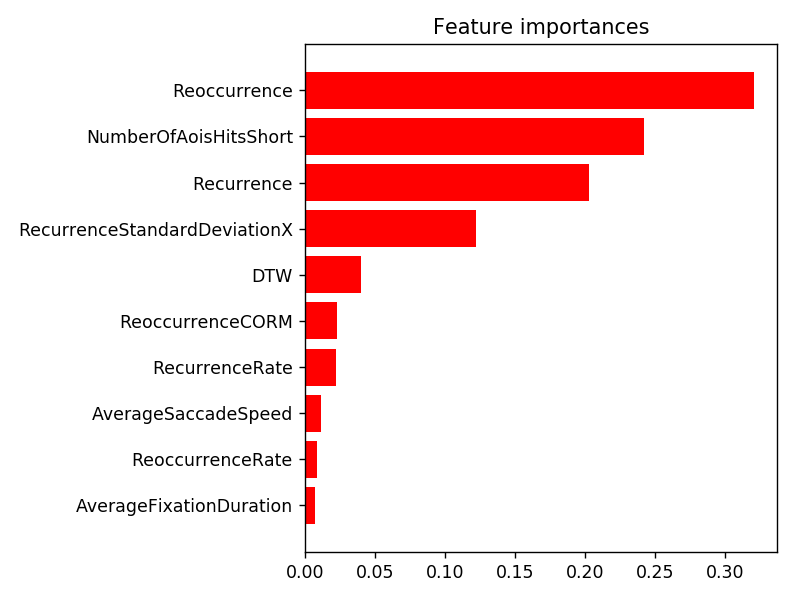

In [34]:
fu = featureImportance(X,labels_kmedoids,df_dropped_columns,300, 1)

#### Rozdelenie dát do dvoch zhlukov

In [35]:
cluster_0, cluster_1 = split_data_to_2_clusters(labels_kmedoids, df_names, df_all_data)
#cluster_0, cluster_1 = split_data_to_2_clusters(labels_kmeans, df_names, df_all_data) # v pripade ze chceme zhluk z k-means

X_cluster_0, df_names_cluster_0, df_all_data_cluster_0, df_dropped_cluster_0 = prepare_data(cluster_0["Name"], COLUMNS_TO_DROP_0)
X_cluster_1, df_names_cluster_1, df_all_data_cluster_1, df_dropped_cluster_1 = prepare_data(cluster_1["Name"], COLUMNS_TO_DROP_0)

#### Spustenie algoritmu LOF pre rôzne _k_ a vypísanie odľahlých hodnôt 

Zvolenie intervalu pre algoritmus LOF Na základe rozdelenia do zhlukov pre úlohu prebehne vo funkcii na základe zvolenia či ide alebo nejde o zhluk, rovnako zvolíme aj počet odľahlých hodnôt ktoré chceme nájsť

1) Nad celym datasetom pustim LOF  
2) Nad jednotlivymi zhlukmi pustim LOF

Vo vypise potom vidime konkretnu metriku a potencionalne odlahle hodnoty podla mennych oznaceni participantov

Nad celým datasetom

In [36]:
outliers_minkowski = get_outliers(X, df_names, False, "minkowski", 2)
outliers_correlation = get_outliers(X, df_names, False, "correlation", 2)

** minkowski **
Outliers in data -> ['P208', 'P234', 'P244']
** correlation **
Outliers in data -> ['P247', 'P248']


Nad zhlukmi

In [37]:
print("Cluster " + str(len(df_names_cluster_0)) + " participants ")
outliers_minkowski_cluster_0 = get_outliers(X_cluster_0, df_names_cluster_0, True, "minkowski", 1)
outliers_correlation_cluster_0 = get_outliers(X_cluster_0, df_names_cluster_0, True, "correlation", 1)

print("_________________________________________________")

print("Cluster " + str(len(df_names_cluster_1)) + " participants ")
outliers_minkowski_cluster_1 = get_outliers(X_cluster_1, df_names_cluster_1, True, "minkowski", 1)
outliers_correlation_cluster_1 = get_outliers(X_cluster_1, df_names_cluster_1, True, "correlation", 1)

Cluster 31 participants 
** minkowski **
Outliers in data -> ['P204', 'P217', 'P237']
** correlation **
Outliers in data -> []
_________________________________________________
Cluster 17 participants 
** minkowski **
Outliers in data -> ['P208', 'P247']
** correlation **
Outliers in data -> ['P208', 'P249']


_Zoradení participanti na základe dĺžky plnenia úlohy - trvania fixácií_  
Trvanie plnenia uloh je v sekundach

In [38]:
potencial_outliers_standard = get_data_sorted_by(df_all_data, "FixationsDuration")
potencial_outliers_standard

,FixationsDuration,Name
4,4.334,P204
31,11.567,P237
15,17.057,P215
29,22.327,P235
39,24.980,P247
17,28.989,P218
38,32.568,P246
32,32.740,P238
27,33.555,P233
3,34.768,P203


#### Vizualizácia dát

#### LOF algoritmus so skóre odľahlosti

Datove body su participanti, cerveny kruh znaci stupen odlahlosti (cim vacsi tym vacsie skore) a pri jednotlivych bodoch su aj ciselne oznacenia participantov

<IPython.core.display.Javascript object>


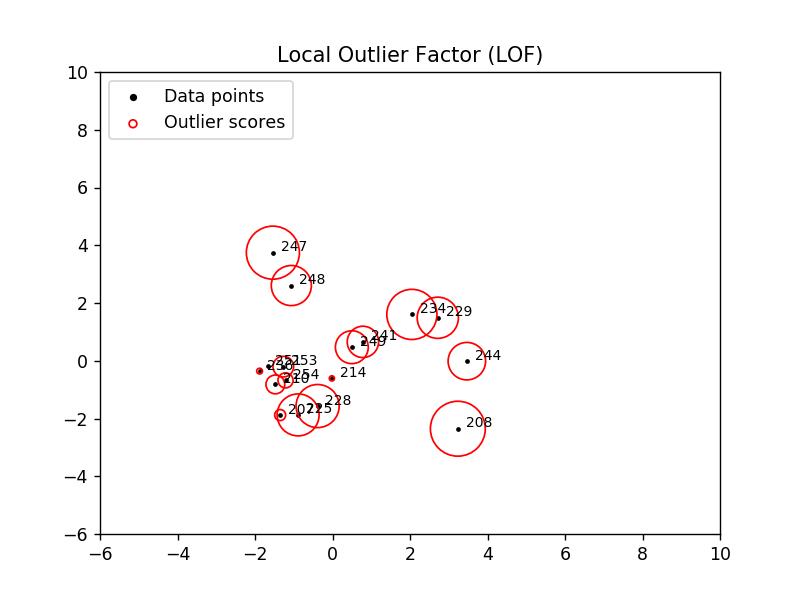

In [43]:
sc, lf = run_LOF(X_cluster_1, df_names_cluster_1, 5, "minkowski", True, True, -6, 10, 1)

#### Vizualizácia scanpathov a porovnanie sekvencií participantov

Modrou farbou je oznaceny participant p1
Cervenou farbou je oznaceny participant p2

Pod vizualizaciami su zobrazene vsetky ich vypocitane crty

<IPython.core.display.Javascript object>


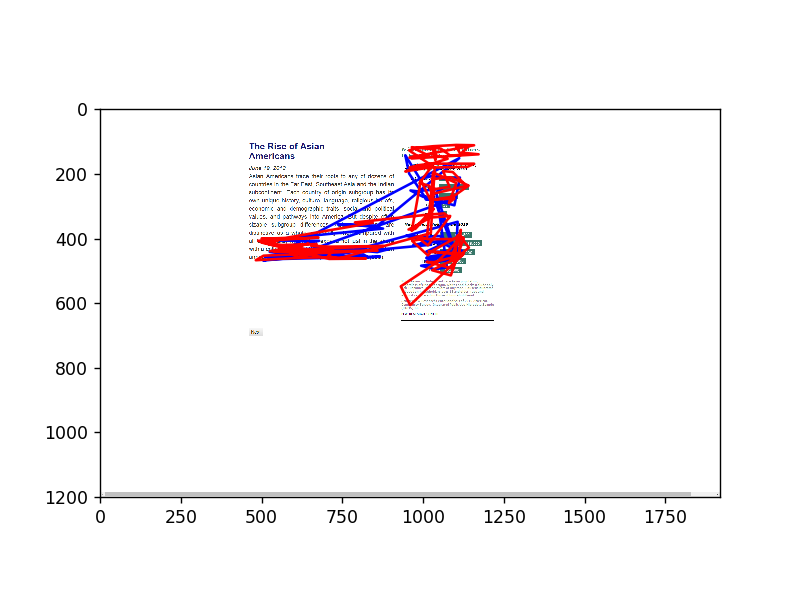

{'Name': 'P238', 'Scanpath': 'LABBBBBGCLLRMMDDEEEDLEEEEFFJJJEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARFAA', 'ScanpathShort': 'LABGCLRMDEDLEFJEARFA', 'NumberOfAoisHits': 79, 'NumberOfAoisHitsShort': 20, 'NumberOfFixations': 170, 'FixationsDuration': 32.74, 'AverageFixationDuration': 0.19258823529411764, 'AverageSaccadeSpeed': 0.39653207085799397, 'AverageSaccadeLength': 92.07057619212942, 'Reoccurrence': 974, 'ReoccurrenceRate': 6.780368952314654, 'ReoccurrenceDeterminism': 2.6694045174537986, 'ReoccurrenceLaminarity': 2.0533880903490758, 'ReoccurrenceCORM': 1.9233806787115904, 'Recurrence': 2878.0, 'RecurrenceRate': 0.21014968966776196, 'RecurrenceMeanX': 67.37699791521891, 'RecurrenceMeanY': 88.09798471160528, 'RecurrenceStandardDeviationX': 331.5626189238985, 'RecurrenceStandardDeviationY': 420.42841343392615, 'DTW': 16211.7908813492, 'MaxLcs': 0.85, 'MeanLcs': 0.5925531914893617, 'MinLcs': 0.2, 'MaxLev': 32, 'MeanLev': 14.936170212765957, 'MinLev': 3}


{'Name': 'P253', 'Scanpat

In [45]:
p1 = "P238"
p2 = "P253"
imgPath = "../data_msnv/screens/66.png"
plot_participant_fixations_to_aoi(p1, False, p2, True, imgPath)

print(ALL_PARTICIPANTS[p1].data)
print("\n")
print(ALL_PARTICIPANTS[p2].data)

<IPython.core.display.Javascript object>


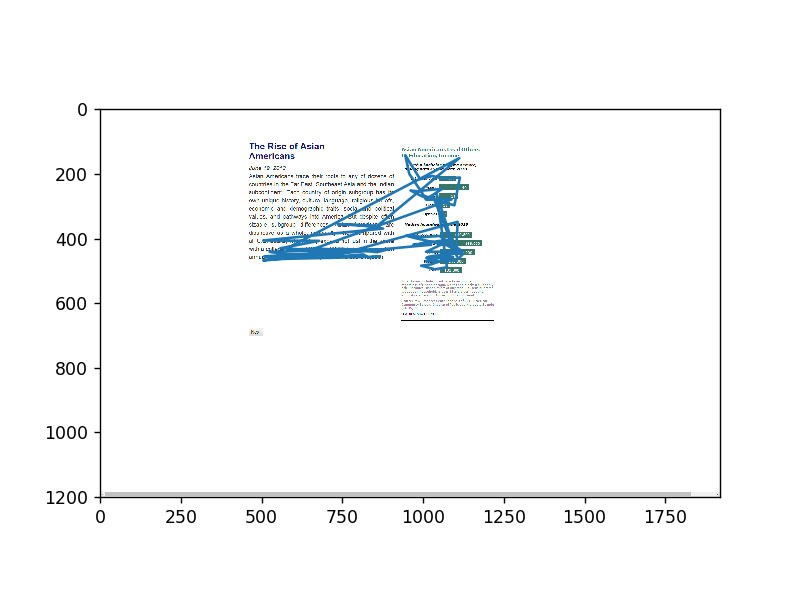

In [46]:
# Zvlast pre participanta P1
plot_participant_fixations_to_aoi(p1, True, p2, True, imgPath)

<IPython.core.display.Javascript object>


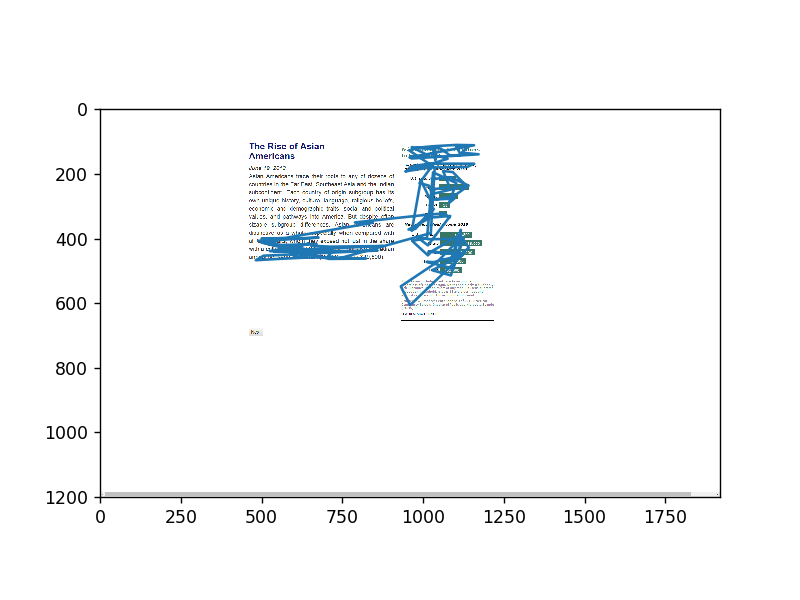

In [47]:
# Zvlast pre participanta P2
plot_participant_fixations_to_aoi(p2, True, p2, True, imgPath)

<IPython.core.display.Javascript object>


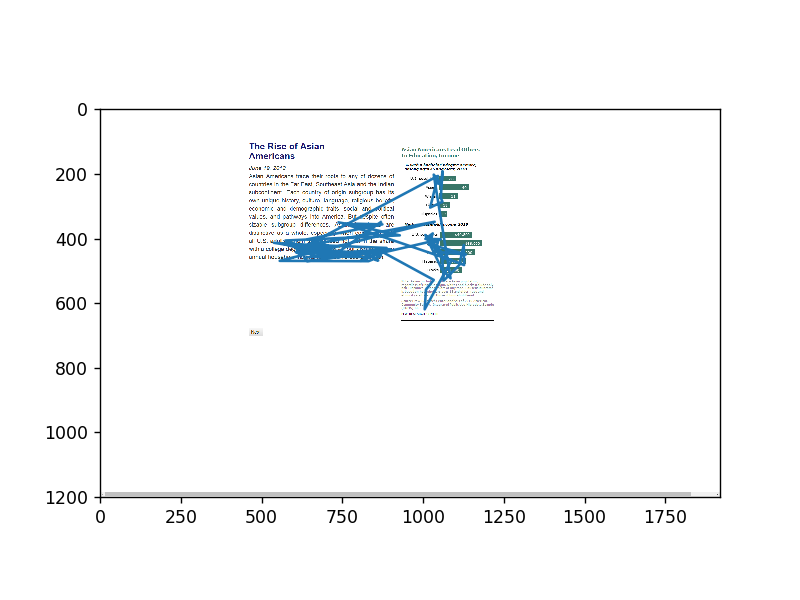

In [48]:
# Zvlast pre participanta P247
plot_participant_fixations_to_aoi("P247", True, p2, True, imgPath)

Korelačná matica čŕt

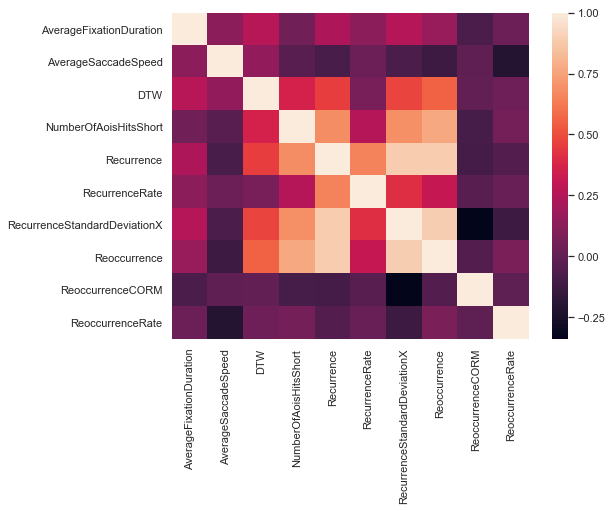

In [50]:
%matplotlib inline
get_correlation_matrix(df_dropped_columns)